<a href="https://colab.research.google.com/github/Mdrsilva/Airbnb_Data_Analysis_Vancouver_Canada/blob/main/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science and Data Analysis**
*by [Marriane Silva](https://github.com/Mdrsilva)*

[![LinkedIn](https://img.shields.io/badge/LinkedIn-marrianesilva-blue.svg)](https://www.linkedin.com/in/marriane-dos-reis-silva/)[![GitHub](https://img.shields.io/badge/GitHub-marrianesilva-purple.svg)](https://github.com/Mdrsilva)
---

# Airbnb Data Analysis - *Vancouver, Canada*


[Airbnb](https://www.airbnb.com/) began in 2008 when two designers hosted three travelers who needed a place to stay. Being a shortened version of its original name, "Air Bed and Breakfast", nowadays, Airbnb is considered the **biggest hotel company**, and the interesting fact is that Airbnb is **not hotel owned or operated**!

The Airbnb platform provides a more convenient, affordable and relatively stress-free way to rent a space, connecting travelers and hosts who want to rent their places in a practical way.

Online marketplace for lodging, the company listings are primarily homestays for vacation rentals and tourism activities. In the beginning of 2022, guests had booked over 1 billion stays all over the world, according to [Airbnb Statistics](https://ipropertymanagement.com/research/airbnb-statistics).


Airbnb provides data for some of the world's main cities, which can be found in the [Inside Airbnb Portal](http://insideairbnb.com/get-the-data.html), making it possible to develop projects and *Data Science* solutions using large amounts of data.

<center><img alt="Analysing Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, I will analyze data from Vancouver, Province of British Columbia (BC), and extract insights from the raw data.**

#Vancouver Overview


Located in the Lower Mainland region of the Province of BC, Vancouver is the most populous city in Western Canada. The 2021 census recorded 662,248 people in the city, up from 631,486 in 2016. The Greater Vancouver area had a population of 2.6 million in 2021, making it the third-largest metropolitan area in Canada. 

Framed by the Pacific Ocean and Coast Mountains, Vancouver is one of the most ethnically diverse cities in Canada. Surrounded by mountains, this location is a popular filming spot which boasts a thriving arts community, including music, theatre and events. Movies such as ***Big Eyes***, ***Apollo 18***, ***This Means War***, ***X-Men: The Last Stand***, ***Twilight: Breaking Dawn Part 2***, ***Juno***, ***Mission Impossible IV: Ghost Protocol*** were shot almost entirely in Vancouver. This city certainly lives up to the nickname “Hollywood North”.

<center><img alt="Analysing Airbnb" width="90%" src="https://wallpaperaccess.com/full/1593382.jpg"></center>


>**_"You’re gorgeous, you’re sophisticated, you live well…Vancouver is Manhattan with mountains. It’s a liquid city, a tomorrow city, equal parts India, China, England, France, and the Pacific Northwest. It’s the cool North American sibling."_** - The New York Times 

>**_“To describe the beauties of this region will on some future occasion be a very grateful task to the pen of a skilled panegyrist. The serenity of the climate, the innumerable pleasing landscapes, and the abundant fertility that unassisted nature puts forth, requires only to be enriched by the industry of man with villages, mansions, cottages, and other buildings.”_** - Captain George Vancouver, 1972</p>


## Data Extractions

The data was obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) and is composed of 1 table, **_listings.csv_**, which summarizes information and metrics for listings in Vancouver.


Before moving forward, I will import the table and do some basic visualizations.



In [71]:
# Importing all the required libraries needed for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [72]:
# Importing the required file
df_airbnb = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2022-09-10/visualisations/listings.csv")


## Exploratory Data Analysis (EDA)

This step focuses on examining and understanding the data, extracting insights and main characteristics, as well as how the information is structured.

**Variables dictionary**
* `id` - Airbnb's unique identifier for the listing
*  `name`	- Name of the listing
* `host_id`	-	Airbnb's unique identifier for the host/user
* `host_name`	-	First name of the host(s)
* `neighbourhood_group`	-	The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles
* `neighbourhood`	- Neighbourhood name
* `latitude`	-	Uses the World Geodetic System (WGS84) projection for latitude and longitude
* `longitude`	- Uses the World Geodetic System (WGS84) projection for latitude and longitude
* `room_type`	-	Entire home/apt, Private room, Shared room, Hotel
* `price`	-	Daily price in local currency
* `minimum_nights`	-	Minimum number of nights staying at listing (calendar rules may be different)
* `number_of_reviews`	- The number of reviews the listing has
* `last_review`	- The date of the last/newest review
* `reviews_per_month` -	The number of reviews the listing has over the lifetime of the listing
* `calculated_host_listings_count`	-	The number of listings the host has in the current city/region geography
* `availability_365` - The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host
* `number_of_reviews_ltm`	- The number of reviews the listing has (in the last 12 months)
* `license`	- The licence/permit/registration number

Before starting the analysis, these are some of the questions I have specified for this project:

* **`Q1. How many attributes (variables) and entries (rows) does the dataset have? What are the types of variables?`**
* **`Q2. Are there missing values?`**
* **`Q3. What are the frequency distributions of the variables?`**
* **`Q4. What is the average rental price?`**
* **`Q5.Are there outliers?`**
* **`Q3. What are the distributions of the variables?`**
* **`Q4. Are there outliers?`**
* **`Q5. What are the correlations between the variables?`**

Let's take a look at the **df_airbnb** table, displaying the first 5 entries.



In [73]:
# Checking the first 5 entries of the dataset
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,100,30,437,2022-07-05,2.94,1,35,7,18-611603
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,94,2022-09-01,0.68,1,204,4,NaN
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.23,1,0,0,21-156500
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,166,30,261,2022-08-16,1.71,3,185,3,19-162091
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.14,1,10,2,19-162421


### **Q1. How many attributes (variables) and entries (rows) does the dataset have? What are the types of variables?**

I downloaded the summarized version of the Airbnb dataset. On the same page, there is a full version with more than 74 variables.

In [74]:
# Identifying the dataframe shape
print("Entries:\t{}".format(df_airbnb.shape[0]))
print("Variables:\t{}".format(df_airbnb.shape[1]))
display(df_airbnb.dtypes)

Entries:	5572
Variables:	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

The df_airbnb table has 5572 rows and 18 columns. The columns `price` is of integer type, `latitude` and `longitude` are of float type. These variables have the expected datatypes; therefore, I do not need to convert those columns. The `last_review` column has a dtype value of object. As this variable represents time, I will convert this column to a datetime dtype using pd.to_datetime() function.

In [75]:
#  Converting the last_review column to a datetime dtype
df_airbnb.last_review = pd.to_datetime(df_airbnb.last_review)

In [76]:
# Checking the columns dtype
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

As we can see, our `last_review` column is now as datetime dtype.

### **Q2. Are there missing values?**

The quality of a dataset is related to the number of missing values. Understanding whether these null values are significant compared to the total entries is crucial.

That being said, it is important to be able to deal with messy data, whether that means missing values, inconsistent formatting, disarranged records, or meaningless outliers.

In [77]:
# Sorting variables in descending order by missing value count
(df_airbnb.isnull().sum()/df_airbnb.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.313711
reviews_per_month                 0.145729
last_review                       0.145729
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

* We can see that 100% of values are missing in the `neighbourhood_group` column. As a result, I will not include this column in my analysis.
* There are approximately 31% missing values in the `license` column. It is likely due to the non-existence of the room/property licensing being published by an individual.
* The `reviews_per_month` and `last_review` variables have around the same quantity of missing values (approximately 15% of the entries). I will verify whether the number of reviews for these locations is zero.
* There are no missing values in the other columns.



In [78]:
# Number of reviews for locations that have a null last_review column
df_airbnb[df_airbnb.last_review.isnull()].number_of_reviews.sum()

0

In [79]:

# Number of reviews for locations that have a null reviews_per_month column
df_airbnb[df_airbnb.reviews_per_month.isnull()].number_of_reviews.sum()

0

I can conclude that the null data actually contains information for the dataset as the database has already been handled by AirBnb staff. Based on the findings above, I will replace the invalid data in the `reviews_per_month` column and the `license` column with zero and the string 'No license', respectively.

In [80]:
# Replacing the null data in the license column
df_airbnb.license.replace(np.nan, 'No license', inplace=True)

In [81]:
# Replacing the null data in the license reviews_per_month
df_airbnb.reviews_per_month.replace(np.nan, 0, inplace=True)

With 100% of missing values, the column `neighbourhood_group` has no predictive power. I will exclude this columns from my dataset.

In [82]:
# Excluding neighbourhood_group column from the dataset
df_airbnb.drop(columns=['neighbourhood_group'], inplace=True)

As mentioned before, the column `last_review` has around 15% of missing values and has not been cleansed. If I chose to use this column in my analysis, I would create a copy of the dataframe, eliminate the null values, and proceed with my analysis.

In [83]:
# Checking the missing values and column types
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5572 non-null   int64         
 1   name                            5572 non-null   object        
 2   host_id                         5572 non-null   int64         
 3   host_name                       5572 non-null   object        
 4   neighbourhood                   5572 non-null   object        
 5   latitude                        5572 non-null   float64       
 6   longitude                       5572 non-null   float64       
 7   room_type                       5572 non-null   object        
 8   price                           5572 non-null   int64         
 9   minimum_nights                  5572 non-null   int64         
 10  number_of_reviews               5572 non-null   int64         
 11  last

There are no longer missing values in the `license` and `review_per_month` columns.

### **Q3. What are the frequency distributions of the variables?**
In order to verify the frequency distributions, I will plot histograms of the numeric variables.

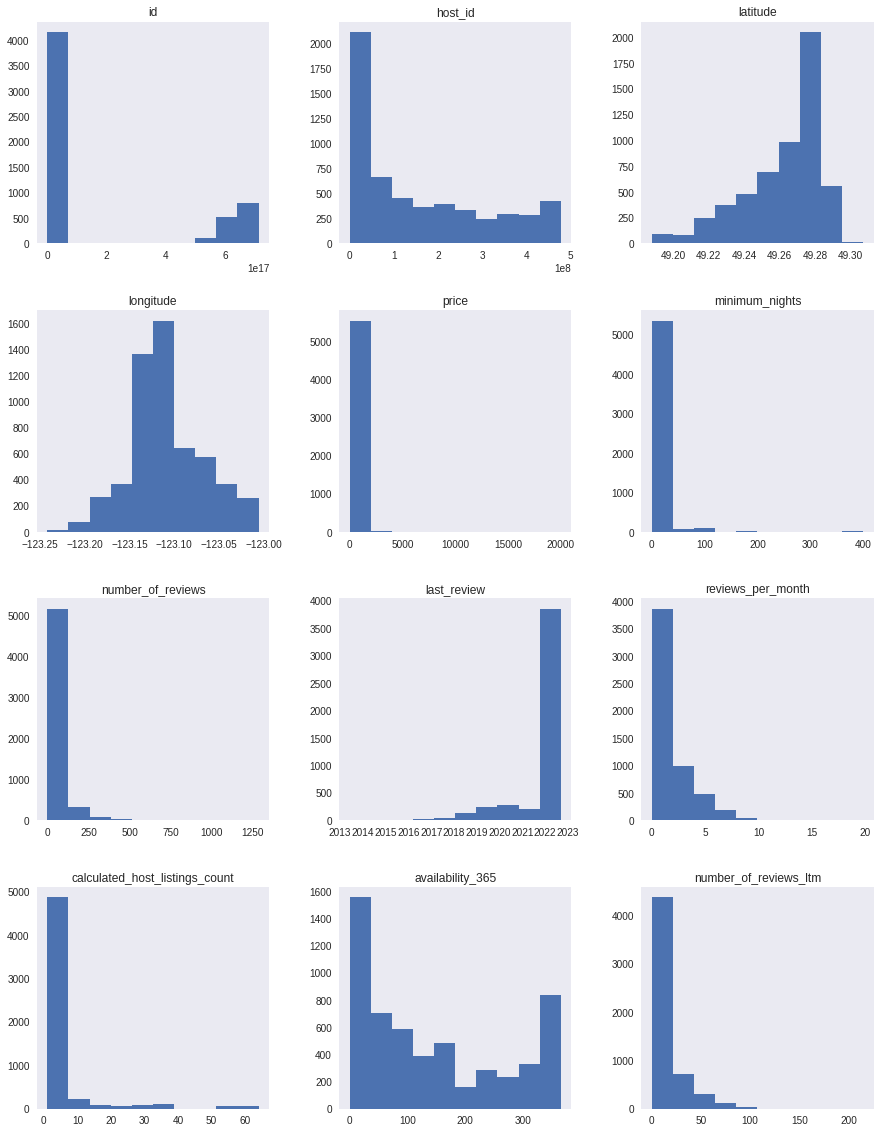

In [84]:
# Using the seaborn plotting view
plt.style.use('seaborn')

# Plotting the histogram of numeric variables
df_airbnb.hist(figsize=(15,20), grid=False);


Here we can see that most variables have an asymmetric distribution and extract some insights:

- Based on the distribution of latitude and longitude, the locations are likely to be concentrated in a certain region.
- The most recent review was given in 2022 and on the same date that the dataset was published, showing that the Airbnb listings have a high turnover rate.
- The `calculated_host_listings_count`, `number_of_reviews`, `reviews_per_month`, `number_of_reviews_ltm`, `minimum_nights` are concentrated in intervals with the lowest values in the dataset.
- The availability of the listing in days (`availability_365`) consistently changes depending on the listing. This means the places tend to be available for different days throughout the year.

### **Q4. What is the average rental price?**

In [85]:
# Calculating the average price
df_airbnb.price.mean()

233.4032663316583

The average price of a listing is CAD $233.40.

### **Q5. Are there outliers?** ###

By the histogram distribution, it is possible to verify the evidence of outliers (these are unusual values, in other words, data points differ significantly from other observations). Outliers present a particular challenge for analysis. Identifying, understanding and treating these values is essential, as they can give us an incorrect picture of our data.


###_Why outlier exists?_
There are generally two reasons for the existence of outliers: 

First, the data might be entered incorrectly. These errors can be a result of human error, generated by the system or a result of an incorrect calculation. Second, they may be real data points which are present because of the nature of the data.

Let's take as an example the `price`, `minimum_nights` and `calculated_host_listing_count` variables. The values do not follow a distribution and distort the entire graphical representation.
To confirm the presence of outliers, I will use these two methods:

* Statistical summary using describe()
* Boxplot and IQR Score Method


In [86]:
# Having a general view of the variables
df_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5572.0,5572.0,5572.0,5572.0,5572.0,5572.0
mean,233.4,16.7,39.3,1.6,4.9,142.2
std,450.0,32.7,72.0,2.0,10.6,126.9
min,0.0,1.0,0.0,0.0,1.0,0.0
25%,115.8,2.0,2.0,0.2,1.0,24.0
50%,170.0,3.0,12.0,0.8,1.0,102.0
75%,262.0,30.0,46.0,2.5,3.0,257.2
max,20000.0,399.0,1285.0,19.8,64.0,365.0


Looking at the statistical summary above, I can confirm some hypotheses, such as:

The `price` variable has 75% of the values below CAD 262.00, but its maximum value is CAD 20,000.00. Based on this, there is evidence of the presence of outliers on this variable. The minimum number of nights (`minimum_nigts`) is 1 night, but the max value is 399 days (over a year), which also shows outliers in the `minimum_night` column.


## Removing Outliers

To address the outliers of this dataset, I will check the statistical distribution, plot boxplots and find the upper and the lower limits of the boxplots using the IQR Score.

The IQR Score method lists the data values from least to greatest. When the values are in ascending order, it is possible to identify the median (Q2). This value is the midpoint in the data set,  dividing the data into a lower 50% and an upper 50%.

The IQR is calculated subtracting the third quartile (75%) from the first quartile (25%).


# IQR = Q3 - Q1


<p align="center"><img src="https://www.simplypsychology.org/boxplot-outliers.png", width="50%"></p>

Let's take a look at the data and see the findings.

In [87]:
# Identifying outliers in the price column
q1_price = df_airbnb.price.quantile(.25)
q3_price = df_airbnb.price.quantile(.75)
IQR_price = q3_price - q1_price
print('Price IQR:', IQR_price)

# Defining the upper and the lower limits                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Price upper limit:', sup_price)
print('Price lower limit:', inf_price)


Price IQR: 146.25
Price upper limit: 481.375
Price lower limit: -103.625


I can conclude that I do not have lower outliers, as the minimum price is zero. The zero price will be excluded from the dataset as it does not make sense to have a listing which is 0 CAD. I will also exclude the higher outliers, representing 6.55% of the data, as shown below.

#### Boxplot for price



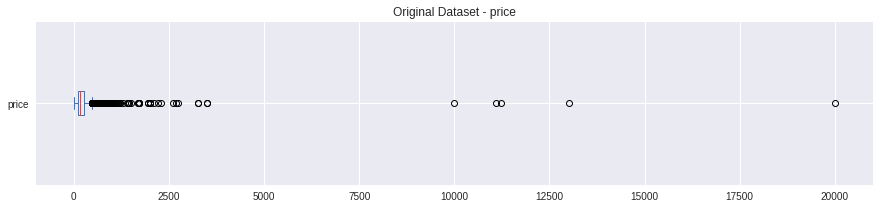

The dataset has 5572 columns
365 entries greater than 481.37
Representing 6.55% of the dataset


In [88]:
# Verifying the original dataset
fig, ax = plt.subplots(figsize=(15,3))
df_airbnb.price.plot(kind='box', vert=False);
ax.set_title('Original Dataset - price')
plt.show()
print("The dataset has {} columns".format(df_airbnb.shape[0]))
print("{} entries greater than 481.37".format(len(df_airbnb[df_airbnb.price > sup_price])))
print("Representing {:.2f}% of the dataset".format((len(df_airbnb[df_airbnb.price > sup_price]) / df_airbnb.shape[0])*100))



In [89]:
# Identifying the outliers in the minimum_nights column
q1_minimum_nights = df_airbnb.minimum_nights.quantile(.25)
q3_minimum_nights = df_airbnb.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('Mininum nights IQR: ', IQR_minimum_nights)

# Defining the upper and the lower limits                                                                              
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Minimum_nights upper limit:', sup_minimum_nights)
print('Minimum_nights lower limit:', inf_minimum_nights)

Mininum nights IQR:  28.0
Minimum_nights upper limit: 72.0
Minimum_nights lower limit: -40.0


I can conclude that the `minimum_nights` variable has no lower outliers, as minimum night is 1 night. However, I will exclude the higher outliers, representing 2.94% of the data, as shown below.

#### Boxplot para minimum_nights


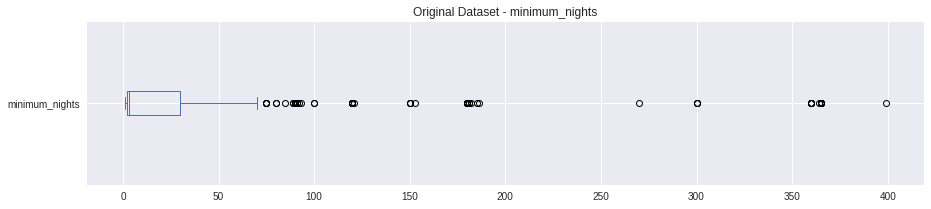

The dataset has 5572 columns
164 entries greater than 72
Representing 2.94% of the dataset


In [90]:
# Verifying the original dataset
fig, ax = plt.subplots(figsize=(15,3))
df_airbnb.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Original Dataset - minimum_nights')
plt.show()
print("The dataset has {} columns".format(df_airbnb.shape[0]))
print("{} entries greater than 72".format(len(df_airbnb[df_airbnb.minimum_nights > sup_minimum_nights])))
print("Representing {:.2f}% of the dataset".format((len(df_airbnb[df_airbnb.minimum_nights > sup_minimum_nights]) / df_airbnb.shape[0])*100))

In [91]:
# Cleaning the dataset/excluding the outliers
df_clean = df_airbnb.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
df_clean.drop((df_clean[df_clean.price == 0]).index, axis=0, inplace=True)

print('Dataset shape with outliers:', df_airbnb.shape)
print('Dataset shape without outliers:',df_clean.shape)


Dataset shape with outliers: (5572, 17)
Dataset shape without outliers: (5051, 17)


#### Boxplot for price and minimum_nights in the clean dataset



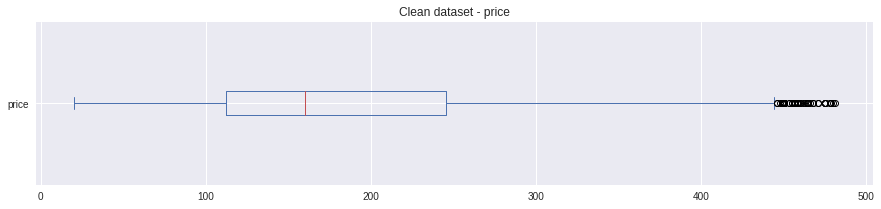

Original dataset: 5572 columns
Clean dataset: 5051 columns


In [92]:
# Verifying the clean dataset - price variable
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Clean dataset - price')
plt.show()
print("Original dataset: {} columns".format(df_airbnb.shape[0]))
print("Clean dataset: {} columns".format(df_clean.shape[0]))

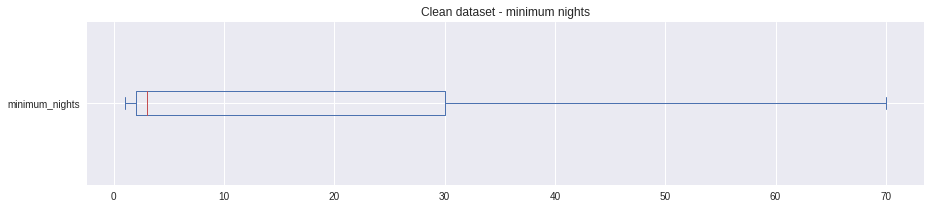

Original dataset: 5572 columns
Clean dataset: 5051 columns


In [93]:
# Verifying the clean dataset - minimum nights variable
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Clean dataset - minimum nights')
plt.show()
print("Original dataset: {} columns".format(df_airbnb.shape[0]))
print("Clean dataset: {} columns".format(df_clean.shape[0]))

Next, I will check the frequency distribution of variables after deleting the outliers.




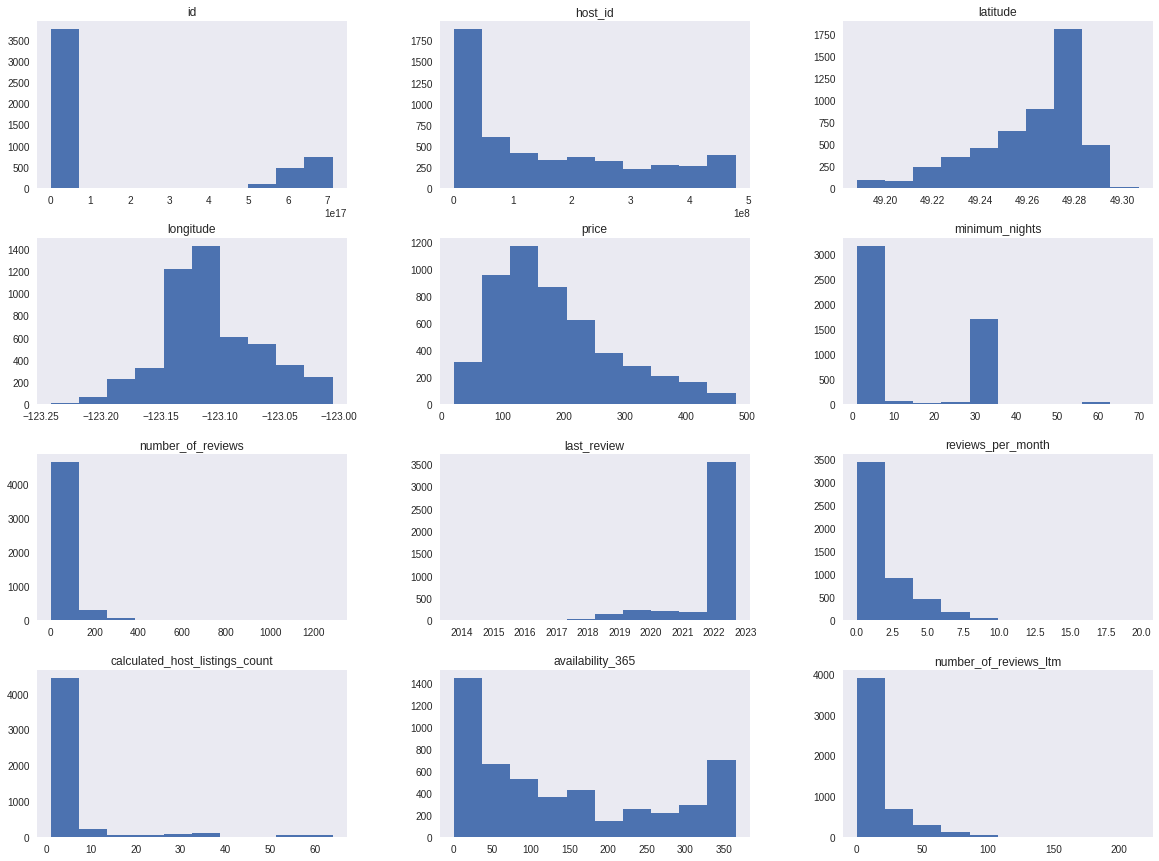

In [94]:
# Using seaborn plotting view
plt.style.use('seaborn')

# Plotting the histogram of numeric variables
df_clean.hist(figsize=(20,15), grid=False);

Now that I have cleaned the data, will recheck the variables.

In [95]:
# Having a general view of the variables
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5051.0,5051.0,5051.0,5051.0,5051.0,5051.0
mean,185.2,12.7,41.2,1.7,4.9,137.8
std,96.8,14.0,74.2,2.0,10.6,125.2
min,20.0,1.0,0.0,0.0,1.0,0.0
25%,112.0,2.0,2.0,0.2,1.0,22.0
50%,160.0,3.0,13.0,0.9,1.0,97.0
75%,245.5,30.0,49.0,2.6,3.0,250.0
max,481.0,70.0,1285.0,19.8,64.0,365.0


0.6408631954068501

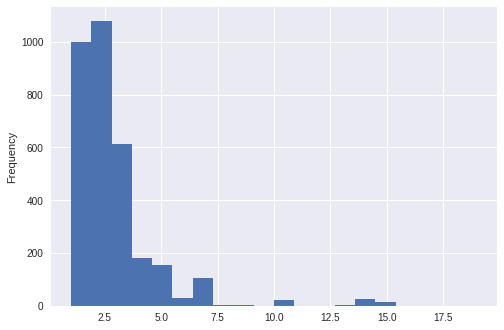

In [96]:
df_clean.minimum_nights[df_clean.minimum_nights < 20].plot.hist(bins=20);
df_clean.minimum_nights[df_clean.minimum_nights < 20].shape[0] / df_clean.shape[0]


The calculated median price is CAD 160.00 and the average price is CAD 185.20 after excluding the outliers. In the dataset with outliers, the median price was CAD 170.00 and the average was CAD 233.40, which shows the average is more sensitive to outliers than the median. Even though 75% of the minimum_nights are lower than 30 days and our maximum `minimum_nights` is 70 days, I can see that 64% of the minimum number of stayed nights are lower than 20 nights.

### **Q6. What type of property is most rented on Airbnb?**

The `room_type` variable column indicates the rental type advertised on Airbnb. People who have already rented with the company know there are options for entire houses or apartments, single rooms, or even sharing rooms with others.

Let's count the number of occurrences of each rental type, using the `value_counts()` method.

In [97]:
# Room type distribution
df_clean.room_type.value_counts()

Entire home/apt    4069
Private room        958
Shared room          19
Hotel room            5
Name: room_type, dtype: int64

In [98]:
df_clean.room_type.value_counts(1)
#df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.805583
Private room       0.189665
Shared room        0.003762
Hotel room         0.000990
Name: room_type, dtype: float64

Entire home/apartment and private rooms represent more than 98% of the dataset, indicating the focus/differentiation of the Airbnb business in Vancouver. On the other hand, hotel rooms and shared rooms are not a substantial part of the business.

### **Q7. What neighbourhoods have more Airbnb rentals?**

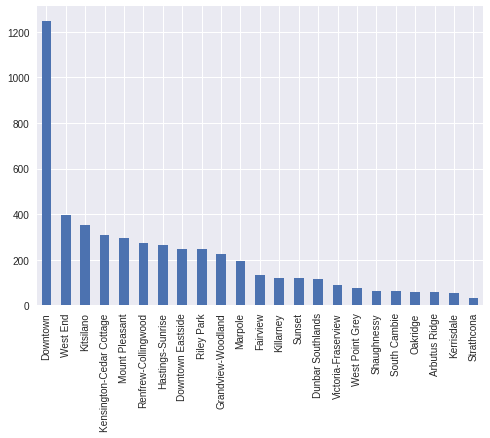

In [99]:
# Checking the rentals by regions
df_clean.neighbourhood.value_counts().plot(kind='bar',rot=90);

As we can see, the top 5 Airbnb neighbourhoods being rented are Downtown, West End, Kitsilano, Kensington-Cedar Cottage and Mount Pleasant.

### **Q8. What are the most expensive locations in Vancouver?**

One way to check one variable against another is to use `groupby()`. In this case, I want to compare the neighbourhoods based on the rental price.

In [100]:
# Checking the average of price per neighbourhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:30]


neighbourhood
Downtown                    226.291433
Downtown Eastside           209.153226
Kitsilano                   203.468927
Strathcona                  191.727273
West Point Grey             191.692308
West End                    188.716080
Mount Pleasant              187.726351
Arbutus Ridge               184.689655
Grandview-Woodland          177.709821
Dunbar Southlands           172.852174
Riley Park                  168.353659
Killarney                   167.852459
Fairview                    166.015038
Marpole                     159.865979
Shaughnessy                 157.312500
Victoria-Fraserview         156.615385
South Cambie                150.793651
Hastings-Sunrise            149.811321
Renfrew-Collingwood         146.746377
Sunset                      146.583333
Kensington-Cedar Cottage    145.719355
Oakridge                    131.627119
Kerrisdale                  127.381818
Name: price, dtype: float64

I can conclude that Downtown, Downtown Eastside, Kitsilano 
and Strathcona have the highest average prices per listing. Kerrisdale, Oakridge, Kensington-Cedar Cottage and Sunset have the lowest average prices.

### **Q9. What is the minimum_nights rental average?**


In [101]:
# Checking the `minimum_nights`average
df_clean.minimum_nights.mean()

12.719461492773709

In Vancouver, Airbnb guests rent a minimum of 13 nights on average.

## Generating Map with the listings

As Latitudes and Longitudes informations are provided for each property, I will create an interactive map, which it is possible to see the listings name by just using the cursor of the mouse.

I will use only a portion of the dataset to have a more focused and better visualization of the listings.

In [103]:
import folium
from IPython.core.display import display, HTML

def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [104]:
# Using a portion of the dataset
df_map = df_clean.sample(frac=0.05, random_state=0)

# Creating the variables
latitude = df_map.latitude.values
longitude = df_map.longitude.values
listings = df_map.name.values


In [113]:
# Creating the map
van = folium.Map(location=[49.2487529,-123.058695],
                 zoom_start=12)

for lat, lon, listing in zip(latitude, longitude, listings):
    folium.Marker(location=[float(lat), float(lon)], tooltip = "Click for more", popup=listing).add_to(van)
    
# Plotting the map
folium_deepnote_show(van)
van.save('van_map.html')

### **Q10. What is the correlation between the variables?**

Here I will check if there is a relationship or similarity between the variables.

This relationship can be measured using the correlation coefficient to establish the intensity. To identify the existing correlations between the variables of interest, I will:

* Create a correlation matrix
* Plot a correlation heatmap using the seaborn library

In [107]:
# Creating correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# Displaying correlation matrix 
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.248137,-0.029934,0.178842,-0.020630,0.093605
minimum_nights,-0.248137,1.000000,-0.230852,-0.459020,0.247464,0.175462
number_of_reviews,-0.029934,-0.230852,1.000000,0.443699,-0.142824,-0.034876
reviews_per_month,0.178842,-0.459020,0.443699,1.000000,-0.148752,0.033941
calculated_host_listings_count,-0.020630,0.247464,-0.142824,-0.148752,1.000000,0.101404
availability_365,0.093605,0.175462,-0.034876,0.033941,0.101404,1.000000


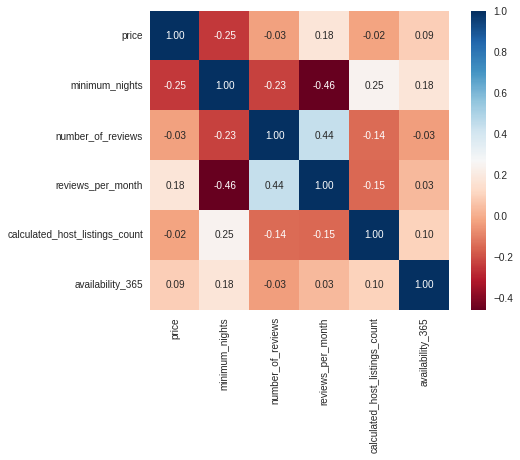

In [108]:
# Plotting a correlation heatmap
sns.heatmap(corr, cmap = 'RdBu', fmt='.2f', square = True , linecolor='white', annot= True);

In general, no significant correlation was found between the price and the other variables. It is interesting to mention the slightly negative correlation between price and minimum_nights variable (-0.25), showing that the higher the daily price is, the lower the number of stayed nights, which would be logical to conclude without the correlation heatmap. 

## Discussions

In this project, I analyzed the Airbnb Dataset and found there were *outliers* in some of the variables.

I noticed that in some locations, only a few observations were available, which can distort the statistical information of some attributes.

People are mostly renting home/apartment and private rooms in Vancouver (around 98% of the dataset).

Downtown, West End and Kitsilano are some of the neighbourhoods with the highest daily price on average. However, in these areas, more listings being rented compared to other areas.

Finally, this *dataset* is a summarized version. For further exploratory data analysis, it might be interesting to use the complete dataset, which contains over 70 attributes.

## Resources used
* [Hands-on Data Science by Sigmoidal](https://sigmoidal.ai/)
* [Python Programming](https://www.python.org/)
* [Data Source - Airbnb](http://insideairbnb.com/get-the-data.html)
* [Airbnb Statistics](https://ipropertymanagement.com/research/airbnb-statistics)
* [Festival and Events in Vancouver](https://curiocity.com/vancouver/)
* [Missing values](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
* [Movies filmed in Vancouver](https://www.canadiantraveller.com/movies_filmed_in_vancouver)
* [About Vancouver](https://worldforumfoundation.org/2021-about-vancouver/)
* [Statcan](https://www12.statcan.gc.ca/census-recensement/index-eng.cfm)
